# Programming with Python MOD007891 
## Assessment Element 010 ( Weighting = 100% )


# Section 1:  ( Analysis of Diabetic Patient Data ) - ( Weighting = 45% )

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable, Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).


#### Upload the provided dataset (diabetes.csv) into your Jupyter Notebook working directory and then complete the following tasks.  

In [172]:
##importing all the necessary module for the activities
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [173]:
#reading the dataset
df = pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [174]:
# Let's look at the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Identify the total number of records? 

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2. Display data types for all columns? 

In [176]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 3.  Check the dataset for the missing values? 

In [177]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Display descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset such as total count, min, max, standard deviation, max and quartiles?

In [178]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you probably have noticed, many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### 5. Identify columns with missing values and find out their frequency? 

In [179]:
##the missing values are zero, so it will be  set to zero for all variables except Outcome and pregnancies because zero in outcome and pregnancies is not a missing value
missing_vals = (df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]==0).sum()
print(missing_vals)

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


### 6. Identify the number of positive and negative patients based on target (dependent) variable, outcome? Plot the frequencies using a bar chart?

In [180]:
#for clear visualization, 1 and 0 in outcome column was grouped into positive and negative and stored in a new column called Outcome_label
df["Outcome_Label"] = df["Outcome"].replace({1: "Positive", 0: "Negative"})

##a count is done to know the total positive and negative
df["Outcome_Label"].value_counts()

Negative    500
Positive    268
Name: Outcome_Label, dtype: int64

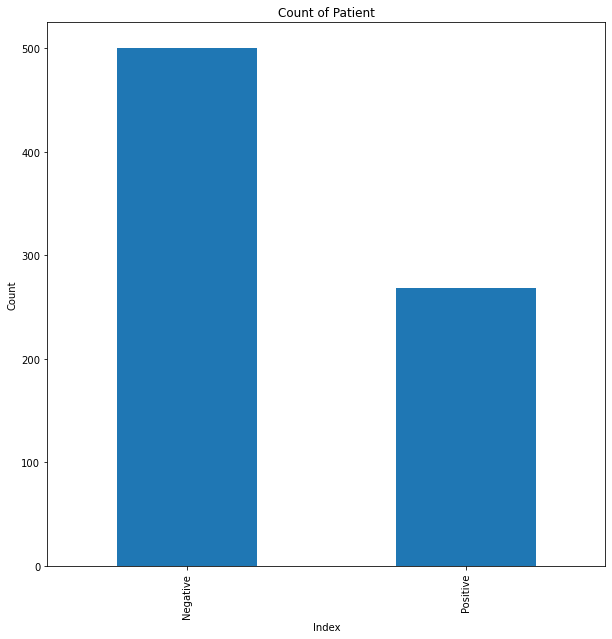

In [181]:
plt.figure(figsize= (10,10))
df["Outcome_Label"].value_counts().plot(kind = 'bar', width = 0.5)
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Count of Patient')
plt.xticks(rotation= 'vertical')
plt.show()

### 7. Display correlation among all dependent and independent variables using the correlation matrix? Illustrate correlation data using a heatmap plot?  

In [182]:
corr_matrix = df.corr(method='pearson')
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


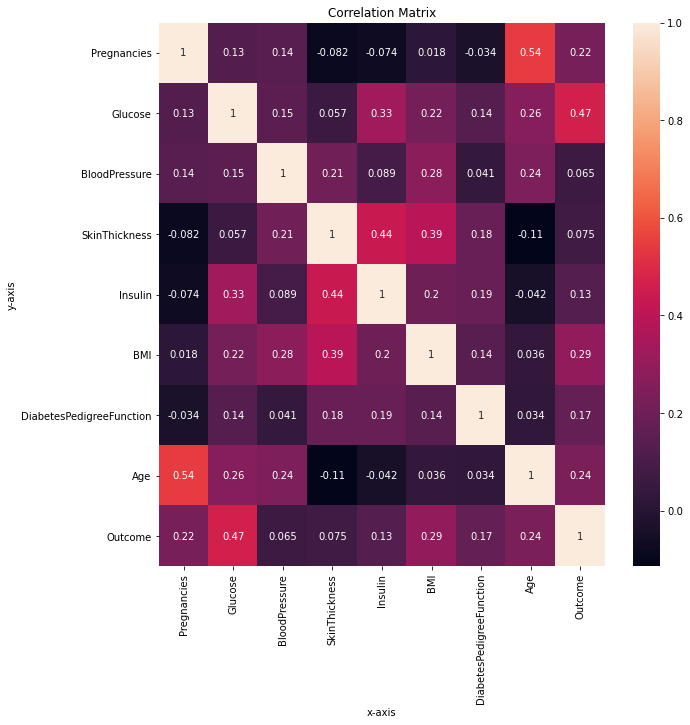

In [183]:
## heatmap plot
plt.figure(figsize = (10,10))

sns.heatmap(corr_matrix, annot = True)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Correlation Matrix')
plt.show()


We have observed earlier that missing values in this dataset are represented by 0. This is clearly not a good practice and negatively impacts our data analysis. 



### 8. Replace these zero values with NAN?

In [184]:
## the columns set as a list in order to get the column index

col_names = list(df.columns)

## zero in outcome and pregnancies column is not a missing number
##the pop was used to stop the outcome and pregnancies value from being replaced with zero using the outcome index number 8
## and pregnancies index 0

col_names.pop(8)
col_names.pop(0)

## for every other column, zero is replaced with Nan
for i in col_names:

    df[i]  = df[i].replace(0, np.nan)
##print an output that replaces every column that has zero with Nan except Outcome and pregnancies Column




In [185]:
## dataset after replacing missing values with Nan
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Positive
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Negative
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Positive
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Negative
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Negative
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,Negative
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Negative
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,Positive


### 9. Check out the variables for 0 value once again?  

In [186]:
# from here we can see that the 0's have been replaced with Nan, so there is no 0 again.
var_value = (df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                     "BMI", "DiabetesPedigreeFunction", "Age"]]==0).sum()
print(var_value)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


### 10. Check out the missing values counts per variable?

In [187]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Outcome_Label                 0
dtype: int64

### 11. Identify the mean value for each variable? 

In [188]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

### 12. For the following columns, fill missing values with mean column values?  
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [189]:
##filling the missing value of glucose with its mean
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())


In [190]:
##filling the missing value of BloodPressure with its mean
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())

In [191]:
##filling the SkinThickness missing value with its mean 
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())

In [192]:
##filling the insulin missing value with its mean
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())



In [193]:
##filling the BMI missing value with its mean
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())


In [194]:
##the new dataset after missing value of glucose, blodpressure, skinthickness, insulin and BMI has been replaced with their mean value
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Positive
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Negative
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Positive
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Negative
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Negative
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Negative
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Negative
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Positive


### 13. Display descriptive statistics and checkout the min values of the aforementioned columns once again? Any ZEROS ? 

In [195]:
## there are no ZEROS
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 14. Check out the missing values counts per variable, once again? 

In [196]:
## all variables except Outcome will be checked because zero in outcome is not a missing value
## only pregnancies  has missing values
df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                     "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 15. Plot data distribution of each variable? Explain your thoughts 

In [197]:
##lets take a look at the data set first
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Positive
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Negative
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Positive
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Negative
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Negative
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Negative
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Negative
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Positive


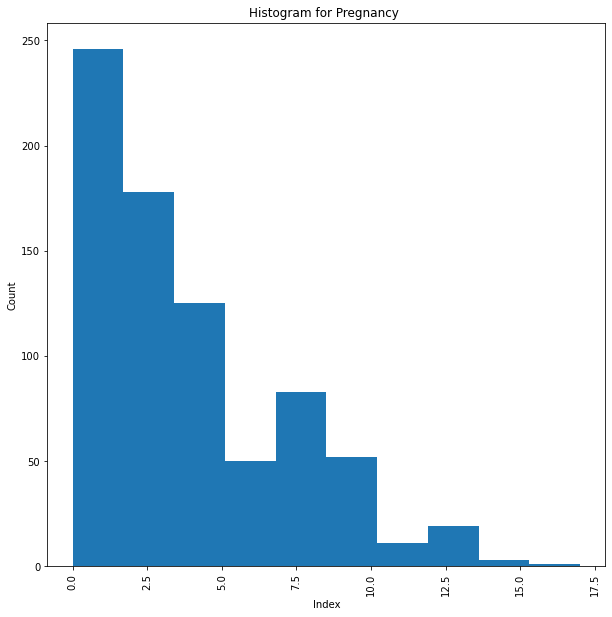

In [198]:
# this is a postively skewed distribution, the distribution is skewed to the right 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['Pregnancies'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for Pregnancy ')
plt.xticks(rotation= 'vertical')
plt.show()



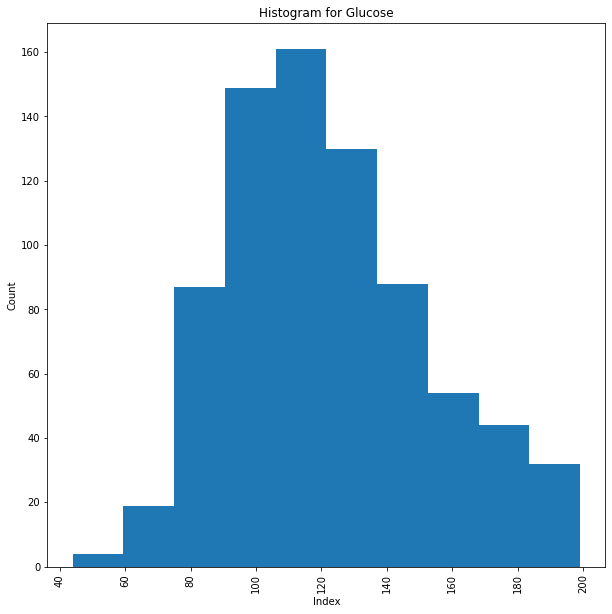

In [199]:
# this is a normal symmentry distribution 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['Glucose'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for Glucose')
plt.xticks(rotation= 'vertical')
plt.show()

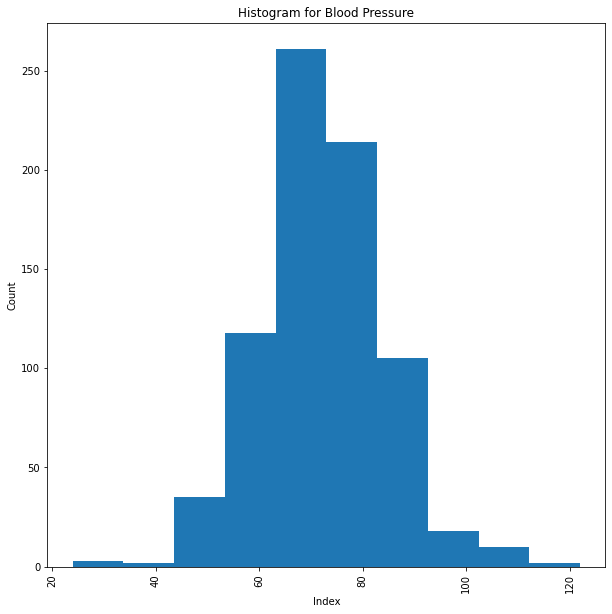

In [200]:
## for BloodPressure
# this is a normal symmentry distribution 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['BloodPressure'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for Blood Pressure')
plt.xticks(rotation= 'vertical')
plt.show()

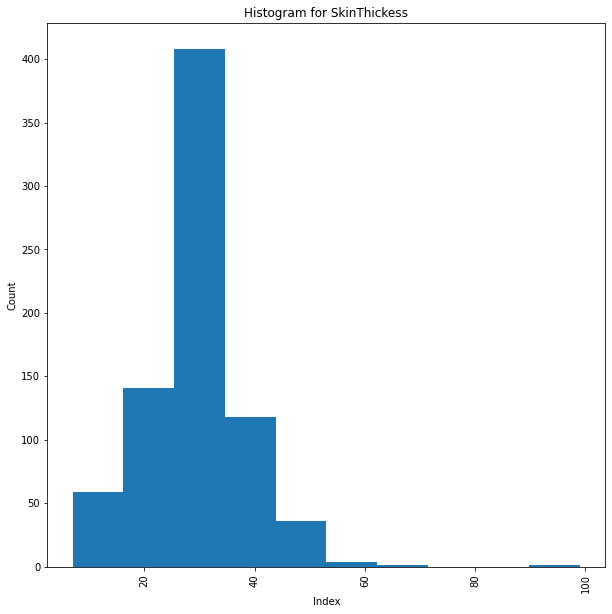

In [201]:
## for SkinThickness
# this is a normal symmentry distribution 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['SkinThickness'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for SkinThickess')
plt.xticks(rotation= 'vertical')
plt.show()



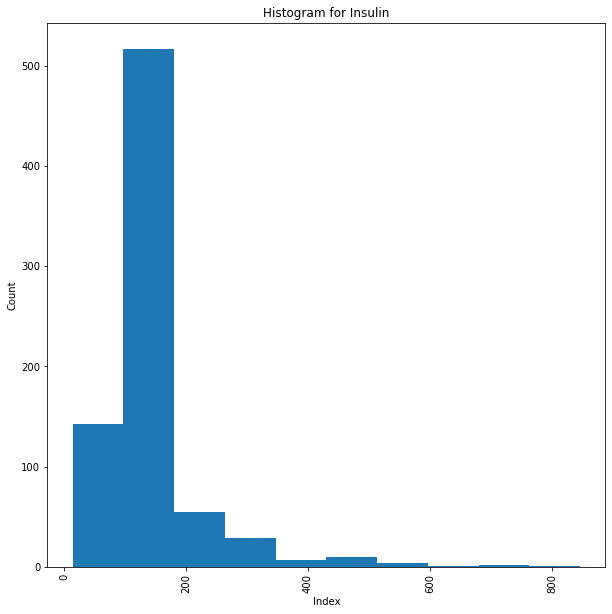

In [202]:
## for insulin
# this is a postively skewed distribution, the distribution is skewed to the right 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['Insulin'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for Insulin')
plt.xticks(rotation= 'vertical')
plt.show()


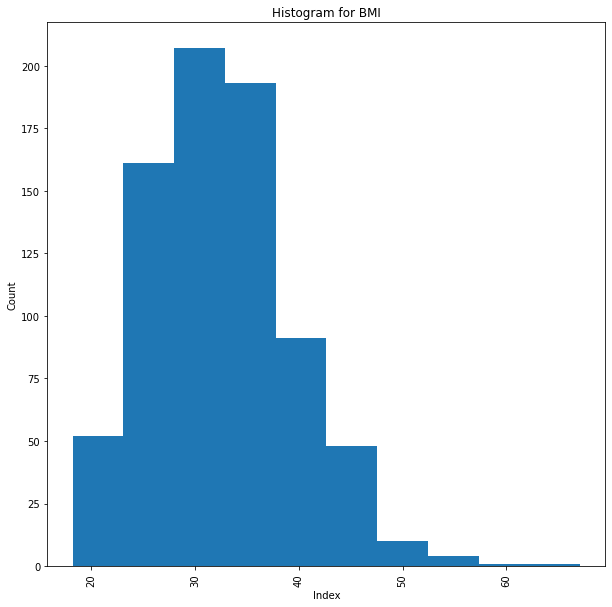

In [203]:
## for BMI
# this is normal symmentry distribution 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['BMI'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for BMI')
plt.xticks(rotation= 'vertical')
plt.show()

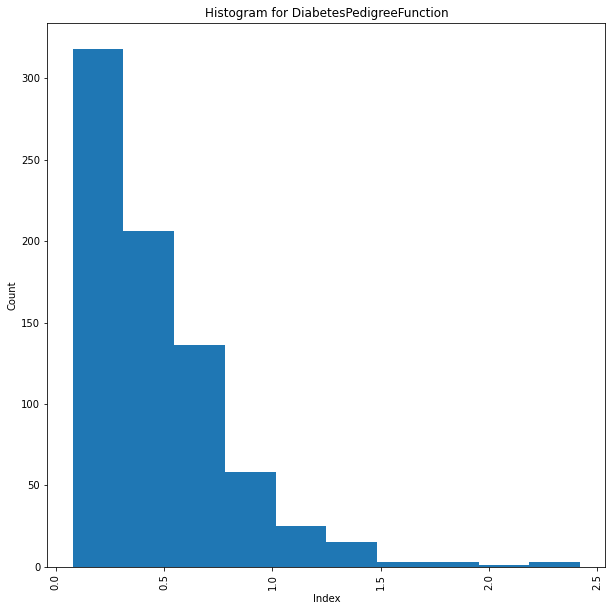

In [204]:
## for DiabetesPedigreeFunction
# this is a postively skewed distribution, the distribution is skewed to the right 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['DiabetesPedigreeFunction'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for DiabetesPedigreeFunction')
plt.xticks(rotation= 'vertical')
plt.show()

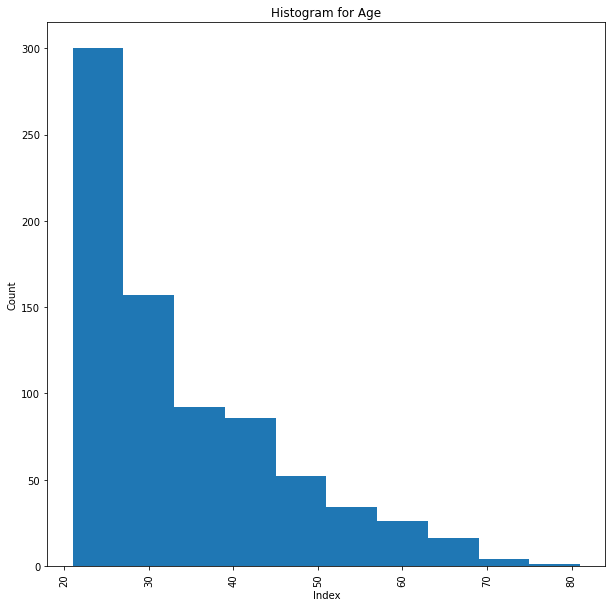

In [205]:
## for Age
# this is a postively skewed distribution, the distribution is skewed to the right
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['Age'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for Age')
plt.xticks(rotation= 'vertical')
plt.show()


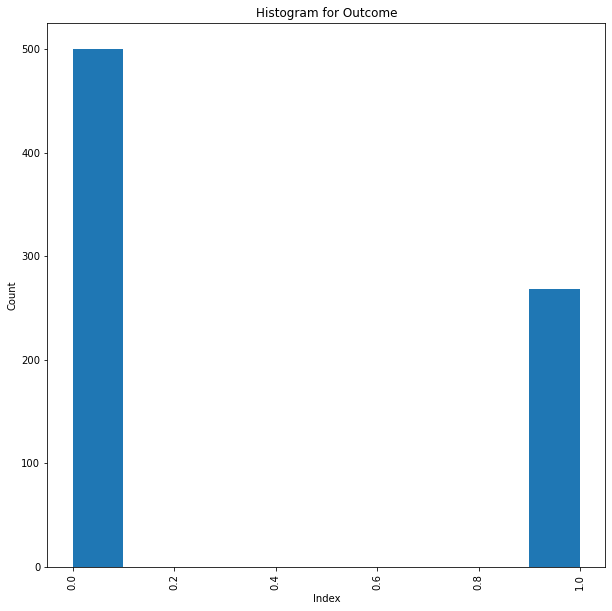

In [206]:
## for outcome
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(df['Outcome'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for Outcome')
plt.xticks(rotation= 'vertical')
plt.show()


A Boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

### 16. Plot the Boxplot for each variable? interpret the diagrams 

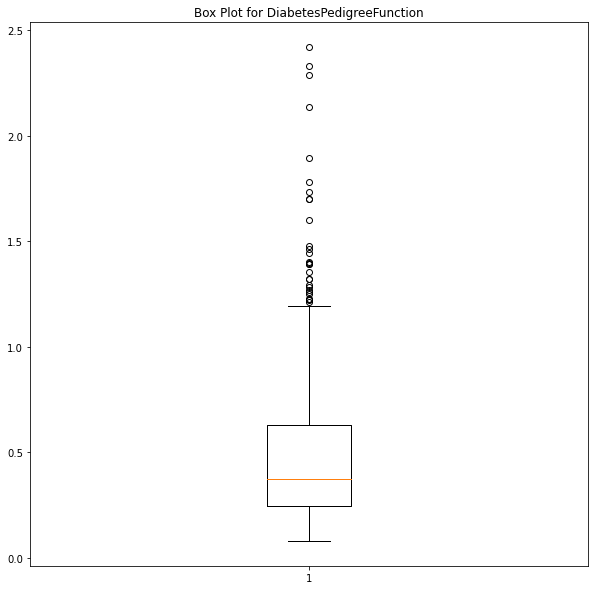

In [207]:
#this distribution is positively skewed because the median is closer to the bottom and there are outliers present
fig = plt.figure(figsize = (10, 10))
data = df['DiabetesPedigreeFunction']
plt.boxplot(data)
plt.title('Box Plot for DiabetesPedigreeFunction')

plt.show()

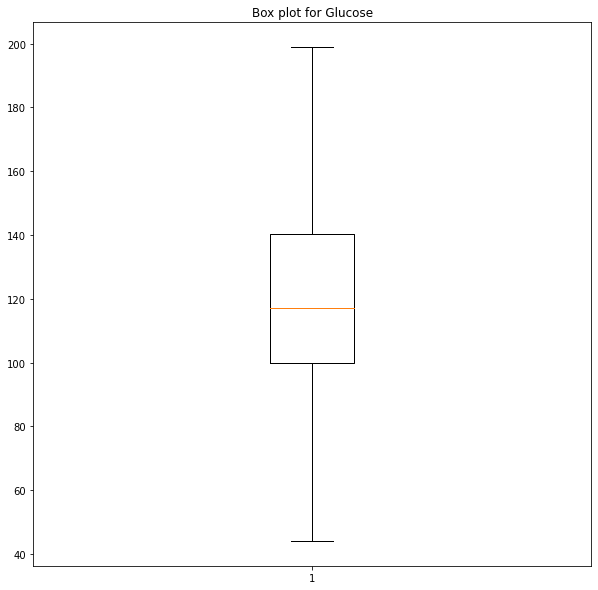

In [208]:
#this distribution is not skewed
fig = plt.figure(figsize = (10, 10))
data = df['Glucose']
plt.boxplot(data)
plt.title('Box plot for Glucose')
plt.show()


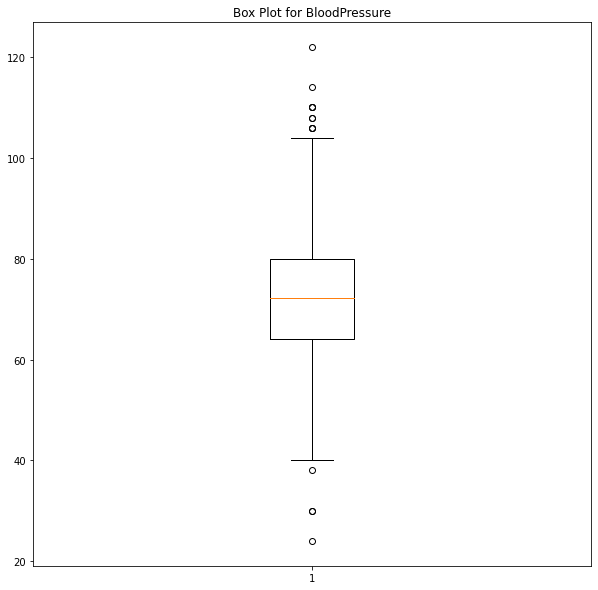

In [209]:
#the distribution is not skewed
fig = plt.figure(figsize = (10, 10))
data = df['BloodPressure']
plt.boxplot(data)
plt.title('Box Plot for BloodPressure')

plt.show()


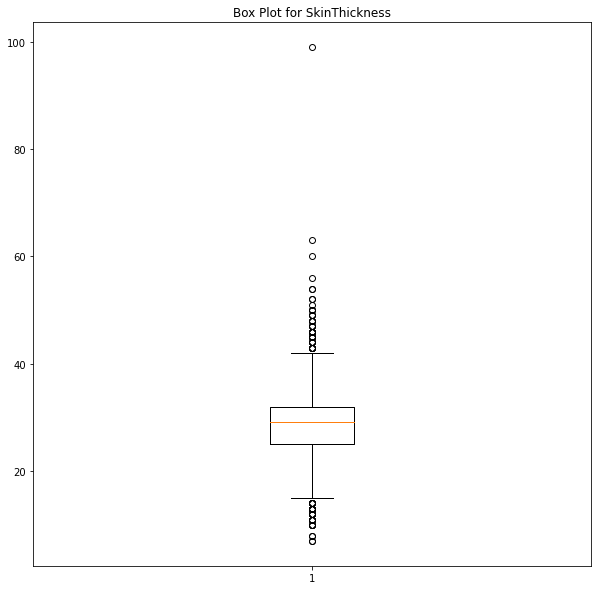

In [210]:
# the distribution is negatively skewed because it is closer to the top
fig = plt.figure(figsize = (10, 10))
data = df['SkinThickness']
plt.boxplot(data)
plt.title('Box Plot for SkinThickness')
plt.show()


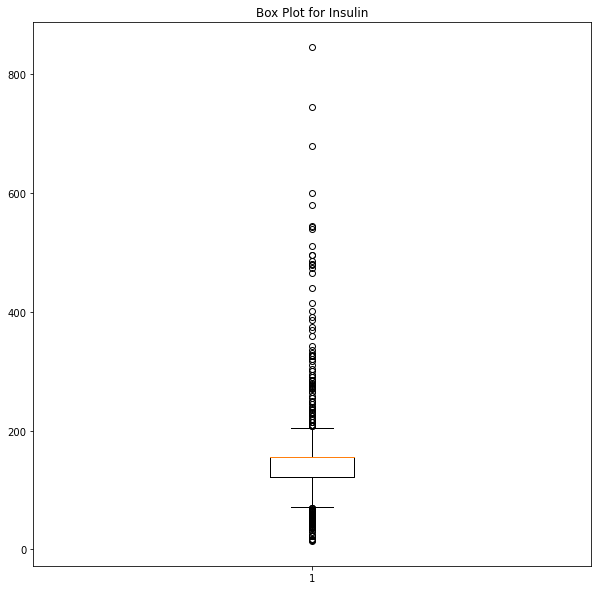

In [211]:

fig = plt.figure(figsize = (10, 10))
data = df['Insulin']
plt.boxplot(data)
plt.title('Box Plot for Insulin')
plt.show()


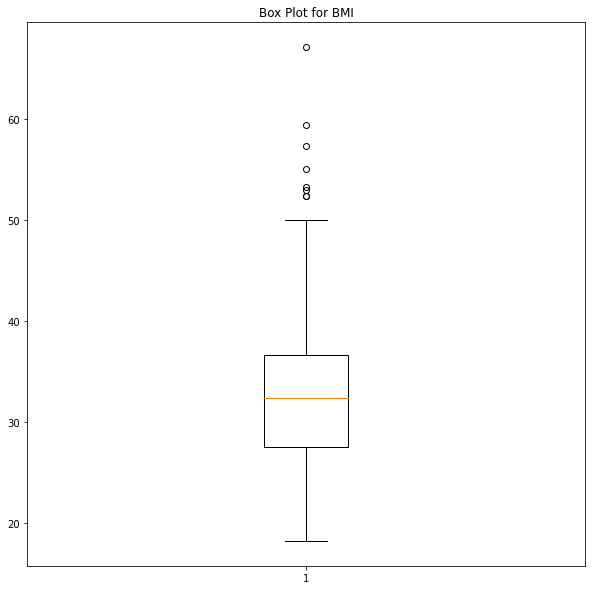

In [212]:
# the destibution is  not skewed
fig = plt.figure(figsize = (10, 10))
data = df['BMI']
plt.boxplot(data)
plt.title('Box Plot for BMI')
plt.show()


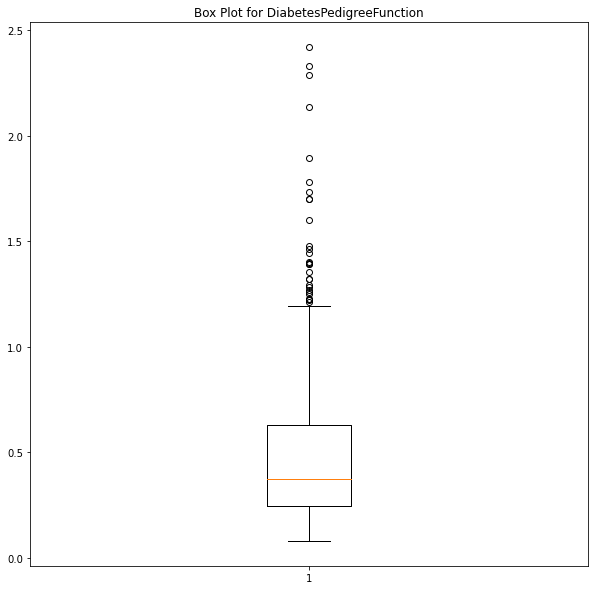

In [213]:
# the distribution is positively skewed, because the median is closer to the bottom
fig = plt.figure(figsize = (10, 10))
data = df['DiabetesPedigreeFunction']
plt.boxplot(data)
plt.title('Box Plot for DiabetesPedigreeFunction')
plt.show()


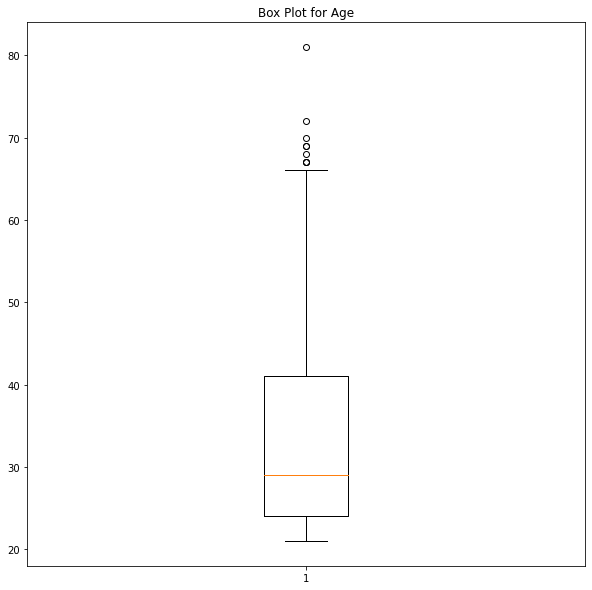

In [214]:
#the distribution is positively skewed, because the median is closer to the bottom
fig = plt.figure(figsize = (10, 10))
data = df['Age']
plt.boxplot(data)
plt.title('Box Plot for Age')
plt.show()


### 17. Plot demographic and distribution of diabetics/nondiabetics across age variable?

In [215]:
#load the dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Positive
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Negative
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Positive
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Negative
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Negative
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Negative
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Negative
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Positive


In [216]:
##getting the count of diabetics and non diabetics across ech age group
d_nd_var = df.groupby('Age')[['Outcome']].sum().sort_values(['Outcome'],ascending = False)
d_nd_var.head()

,Outcome
Age,
25,14
31,13
41,13
29,13
43,11


<Figure size 1440x1440 with 0 Axes>

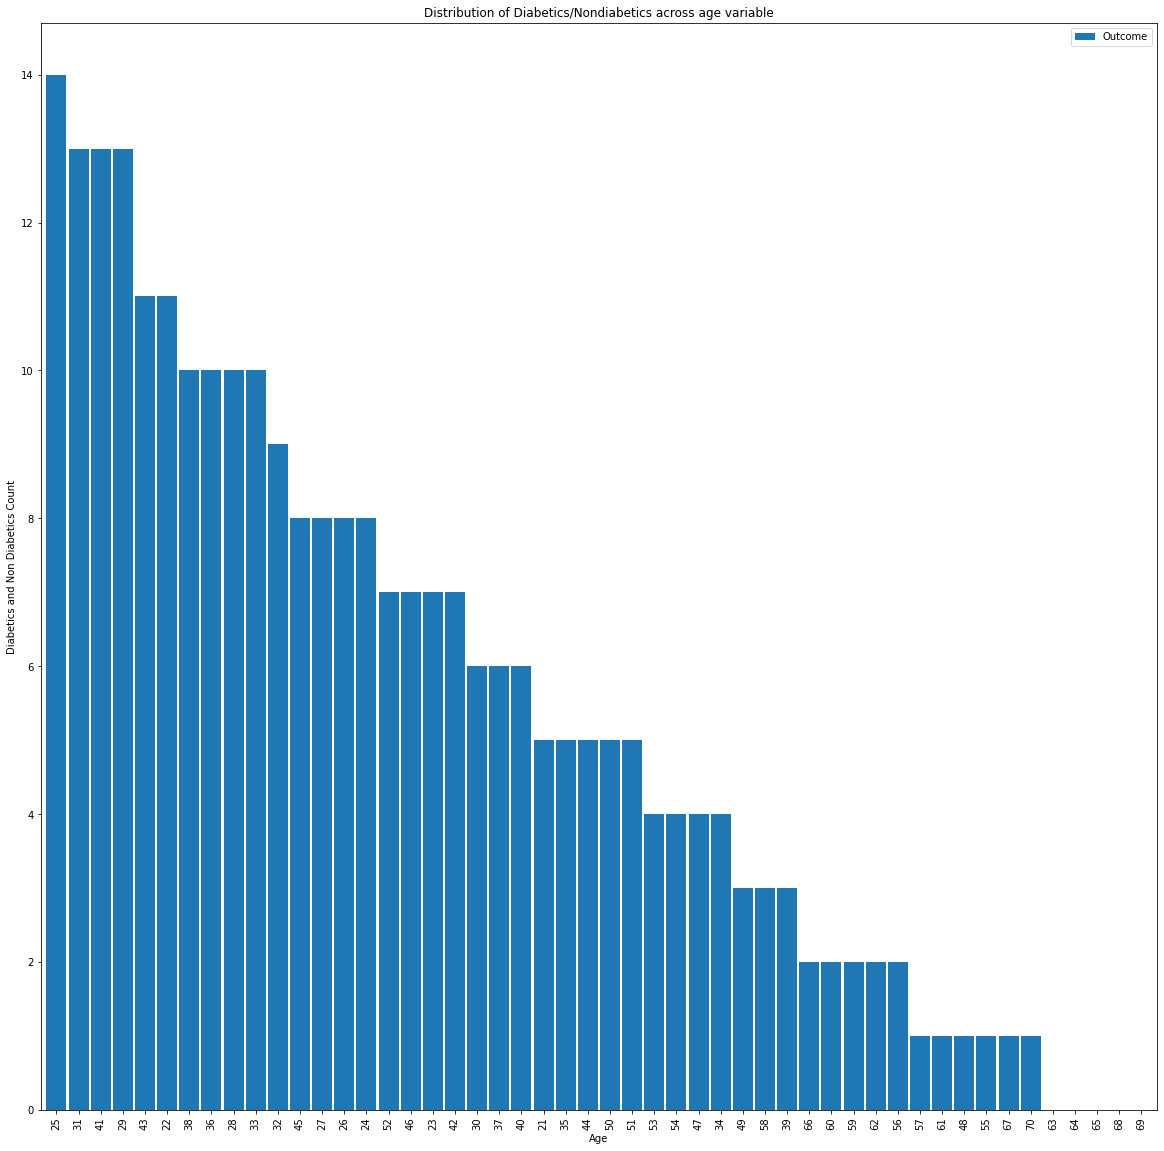

In [217]:
## getting different age count of diabetic and non diabetic.
plt.figure(figsize= (20,20))
d_nd_var.head(50).plot(kind = 'bar', width = 0.9, figsize = (20, 20))
plt.ylabel('Diabetics and Non Diabetics Count')
plt.xlabel('Age')
plt.title('Distribution of Diabetics/Nondiabetics across age variable')
plt.xticks(rotation= 'vertical')
plt.show()


### 18. Investigate how the number of pregnancies impacts diabetes? Demonstrate the relationship with a plot. 

In [218]:
preg_var = df[['Pregnancies', 'Outcome']].groupby('Outcome').count()
preg_var



,Pregnancies
Outcome,
0,500
1,268


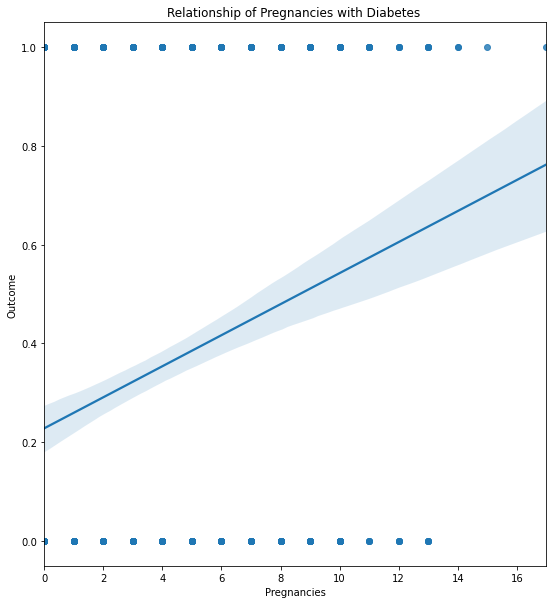

In [219]:
##demonstrate the relationship with seaborn regression plot
plt.figure(figsize=(9,10))
sns.regplot( x='Pregnancies',
    y=('Outcome'),
    data=df,)
plt.title('Relationship of Pregnancies with Diabetes ')

plt.show()

### 19. Check if there are any outliers in our dataset. Any data point outside 25% and 75% quarters can be considered an outlier. Remove the outliers from our dataset. 

In [260]:
##lets check the dataset for outliers
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Positive
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Negative
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Positive
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Negative
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Negative
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Negative
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Negative
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Positive


In [242]:
##removing the outliers in Pregnancies column
max_threshod, min_threshod = df["Pregnancies"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(df.Pregnancies > min_threshod) & (df.Pregnancies < max_threshod)]


6.0 1.0


In [243]:
##removing the outliers in Glucose column
max_threshod, min_threshod = df["Glucose"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(df.Glucose > min_threshod) & (df.Glucose < max_threshod)]

140.25 99.75


In [244]:
##removing the outliers in BloodPressure column
max_threshod, min_threshod = df["BloodPressure"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(df.BloodPressure > min_threshod) & (df.BloodPressure < max_threshod)]

80.0 64.0


In [245]:
##removing the outliers in SkinThickness column
max_threshod, min_threshod = df["SkinThickness"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(df.SkinThickness > min_threshod) & (df.SkinThickness < max_threshod)]

32.0 25.0


In [246]:
##removing the outliers in Insulin column
max_threshod, min_threshod = df["Insulin"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(df.Insulin > min_threshod) & (df.Insulin < max_threshod)]

155.5482233502538 121.5


In [247]:
##removing the outliers in BMI column
max_threshod, min_threshod = df["BMI"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(df.BMI > min_threshod) & (df.BMI < max_threshod)]

36.6 27.5


In [248]:
##removing the outliers in Diabetes Pedigree Function column
max_threshod, min_threshod = df["DiabetesPedigreeFunction"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(df.DiabetesPedigreeFunction > min_threshod) & (df.DiabetesPedigreeFunction < max_threshod)]

0.62625 0.24375


In [249]:
##removing the outliers in Age column
max_threshod, min_threshod = df["Age"].quantile([0.75, 0.25])
print(max_threshod, min_threshod)
new_df = df[(new_df.Age > min_threshod) & (df.Age < max_threshod)]

41.0 24.0


In [130]:
## there is no outliers in the outcome column because all the value stands for something

In [262]:
new_df.shape

(181, 10)

In [266]:
## new dataset after outliers has been removed
new_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label
706,10,115.0,72.405184,29.15342,155.548223,32.457464,0.261,30,1,Positive
463,5,88.0,78.000000,30.00000,155.548223,27.600000,0.258,37,0,Negative
402,5,136.0,84.000000,41.00000,88.000000,35.000000,0.286,35,1,Positive
765,5,121.0,72.000000,23.00000,112.000000,26.200000,0.245,30,0,Negative
437,5,147.0,75.000000,29.15342,155.548223,29.900000,0.434,28,0,Negative
174,2,75.0,64.000000,24.00000,55.000000,29.700000,0.370,33,0,Negative
126,3,120.0,70.000000,30.00000,135.000000,42.900000,0.452,30,0,Negative
477,7,114.0,76.000000,17.00000,110.000000,23.800000,0.466,31,0,Negative
551,3,84.0,68.000000,30.00000,106.000000,31.900000,0.591,25,0,Negative
427,1,181.0,64.000000,30.00000,180.000000,34.100000,0.328,38,1,Positive


### 20. Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to our dataset as a new column. 

- BMI = 0  then “NA”
- 0 < BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- 30 <= BMI then “Obese”


In [267]:
##ccreating BMI_tier column
def BMI(rate):
    if rate == 0:
        return 'NA'
    elif 0 < rate < 18.5:
        return 'Under Weight'
    elif 18.5 <= rate < 25:
        return 'Normal'
    elif 25 <= rate < 30:
        return 'Overweight'
    elif 30 <= rate:
        return 'Obese'
    else:
        return'Good'

In [268]:
new_df['BMI_tier'] = new_df['BMI'].apply(BMI)

<ipython-input-268-cc8e5a1dacec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['BMI_tier'] = new_df['BMI'].apply(BMI)


In [269]:
## new dataset with BMI_tier column
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label,BMI_tier
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0,Negative,Overweight
6,3,78.0,50.000000,32.00000,88.000000,31.0,0.248,26,1,Positive,Obese
11,10,168.0,74.000000,29.15342,155.548223,38.0,0.537,34,1,Positive,Obese
15,7,100.0,72.405184,29.15342,155.548223,30.0,0.484,32,1,Positive,Obese
16,0,118.0,84.000000,47.00000,230.000000,45.8,0.551,31,1,Positive,Obese
...,...,...,...,...,...,...,...,...,...,...,...
748,3,187.0,70.000000,22.00000,200.000000,36.4,0.408,36,1,Positive,Obese
751,1,121.0,78.000000,39.00000,74.000000,39.0,0.261,28,0,Negative,Obese
756,7,137.0,90.000000,41.00000,155.548223,32.0,0.391,39,0,Negative,Obese
764,2,122.0,70.000000,27.00000,155.548223,36.8,0.340,27,0,Negative,Obese


### 21. Plot the BMI_tier histogram ?  

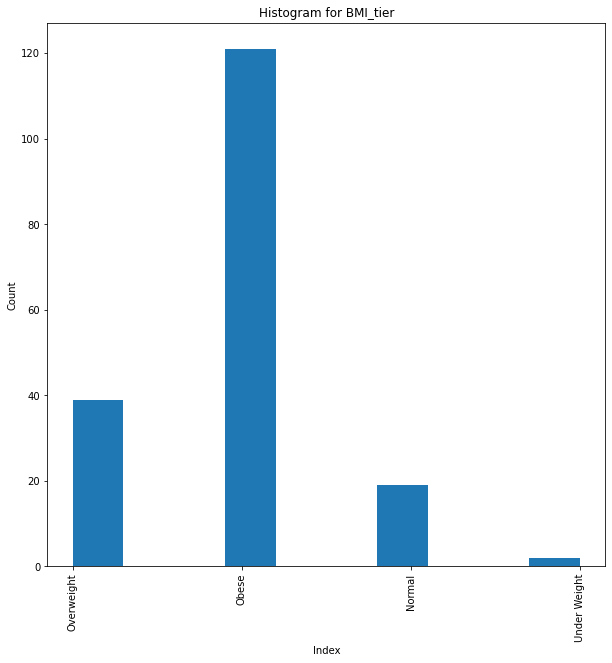

In [270]:
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(new_df['BMI_tier'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for BMI_tier')
plt.xticks(rotation= 'vertical')
plt.show()

### 22. How many obese individuals exist in our dataset?  Use  Piechart to illustrate the proportion of each BMI tier? 

In [271]:
## lets take a look at our dataset
data = new_df['BMI_tier'].value_counts()
data
##there are 121 obese individuals in our dataset

Obese           121
Overweight       39
Normal           19
Under Weight      2
Name: BMI_tier, dtype: int64

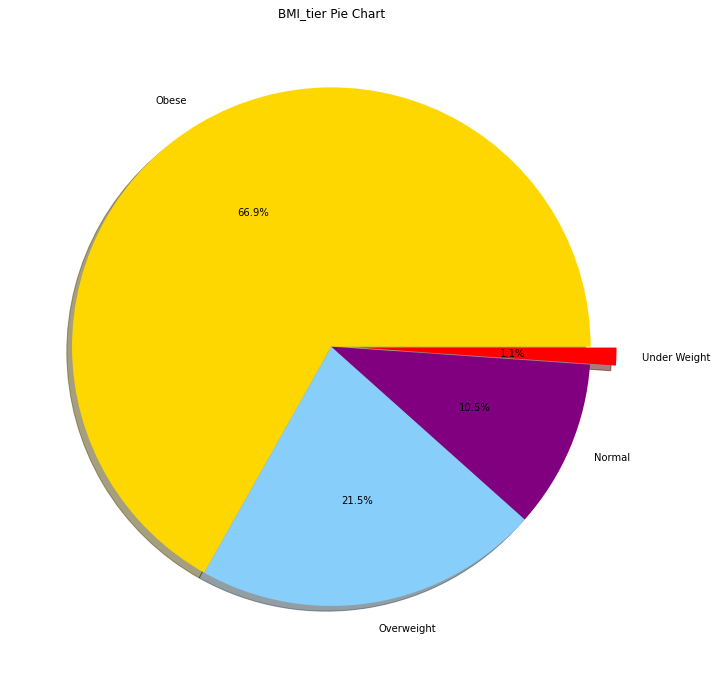

In [272]:
fig, ax = plt.subplots(figsize=(10, 10))
labels=["Obese", "Overweight", "Normal", "Under Weight"]
colors=["gold", "lightskyblue", "Purple", "Red"]
explode=[0, 0, 0, 0.1]
ax.pie(data, labels=labels, explode = explode, colors = colors, autopct='%.1f%%', shadow = True)
ax.set_title('BMI_tier Pie Chart')
plt.tight_layout()

### 23. Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column. 

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”


In [273]:
def Anything_but_Glucose(Glucose):
    if Glucose == 0:
        return 'NA'
    elif Glucose < 140:
        return 'Normal'
    elif 140 <= Glucose < 198:
        return 'Impaired Glucose Tolerance'
    elif 198 <= Glucose:
        return 'Diabetic Level'
    

In [274]:
new_df['OGTT_tier'] = new_df['Glucose'].apply(Anything_but_Glucose)
new_df

<ipython-input-274-f7c29c1d61c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['OGTT_tier'] = new_df['Glucose'].apply(Anything_but_Glucose)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Label,BMI_tier,OGTT_tier
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0,Negative,Overweight,Normal
6,3,78.0,50.000000,32.00000,88.000000,31.0,0.248,26,1,Positive,Obese,Normal
11,10,168.0,74.000000,29.15342,155.548223,38.0,0.537,34,1,Positive,Obese,Impaired Glucose Tolerance
15,7,100.0,72.405184,29.15342,155.548223,30.0,0.484,32,1,Positive,Obese,Normal
16,0,118.0,84.000000,47.00000,230.000000,45.8,0.551,31,1,Positive,Obese,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
748,3,187.0,70.000000,22.00000,200.000000,36.4,0.408,36,1,Positive,Obese,Impaired Glucose Tolerance
751,1,121.0,78.000000,39.00000,74.000000,39.0,0.261,28,0,Negative,Obese,Normal
756,7,137.0,90.000000,41.00000,155.548223,32.0,0.391,39,0,Negative,Obese,Normal
764,2,122.0,70.000000,27.00000,155.548223,36.8,0.340,27,0,Negative,Obese,Normal


### 24.How many individuals are categorized as “Diabetic Level” in our newly created variable, “OGTT_tier”?  Plot the “OGTT_tier” histogram?   

In [275]:
## 2 individual are categorized as Diabetic Level in our newly created variable
new_df['OGTT_tier'].value_counts()


Normal                        133
Impaired Glucose Tolerance     47
Diabetic Level                  1
Name: OGTT_tier, dtype: int64

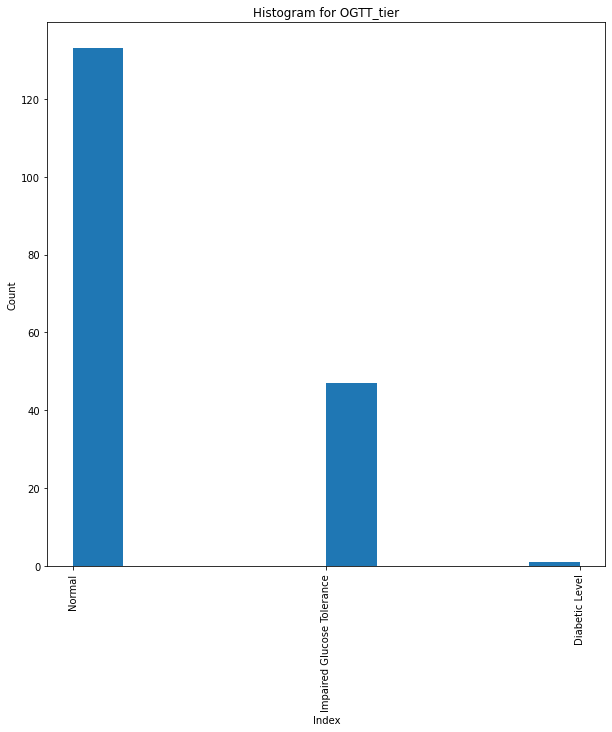

In [276]:
## OGTT_tier Histogram
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(new_df['OGTT_tier'])
plt.ylabel('Count')
plt.xlabel('Index')
plt.title('Histogram for OGTT_tier')
plt.xticks(rotation= 'vertical')
plt.show()

### 25. Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?  

In [277]:
## two of those who categorized as Impaired Glucose Tolerance are diabetes
##One Hundred and Thirt Three out of those with Normal OGTT_tier are categorized diabetes
new_df[['Outcome', 'OGTT_tier']].groupby('OGTT_tier').count()

,Outcome
OGTT_tier,
Diabetic Level,1
Impaired Glucose Tolerance,47
Normal,133


# Section 2:  ( 2021  Tokyo Olympics ) - ( Weighting = 45% )

In this task we work with 2021 Tokyo summer Olympics dataset. This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [278]:
athlete_data = pd.read_excel("Athletes.xlsx")
coach_data = pd.read_excel("Coaches.xlsx")
gender_data = pd.read_excel("EntriesGender.xlsx")
medal_data = pd.read_excel("Medals.xlsx")
team_data = pd.read_excel("Teams.xlsx")
from matplotlib.pyplot import figure

C:\Users\abayo\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [279]:
# Let's look at the first few rows for each table

In [280]:
athlete_data.head()


,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [281]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [282]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [283]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [284]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### 1. Which countries do most athletes come from? Plot a descendingly ordered bar plot to show athletes counts based on their country of origin? 

In [285]:
##grouping of athlete by their country
## most atheletes come from United States of America
athlete_country = athlete_data.groupby('NOC')['Name'].count().sort_values(ascending= False)
athlete_country.head()


NOC
United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
Name: Name, dtype: int64

In [ ]:
## descendingly ordered bar plot to show athletes counts based on their country of origin
plt.figure(figsize= (20,20)) ## the figure size
athlete_country.head(52).plot(kind = 'bar', width = 0.9) ## show for only 52 entries, in order not to mess the bar plot up
plt.ylabel('Count')
plt.xlabel('Discipline')
plt.title('Athlete Count with Country of Origin')
plt.xticks(rotation= 'vertical')
plt.show()

### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

In [287]:
# we'd need to do a merge here(gender_data and athlete_data) because we dont have any table referencing gender and country
country_gender = pd.merge(left = athlete_data,
    right= gender_data,
    how = 'outer',
    left_on='Discipline',
    right_on='Discipline',)

In [288]:
##new dataset after merging showing female athletes
country_gender.head(5)

,Name,NOC,Discipline,Female,Male,Total
0,AALERUD Katrine,Norway,Cycling Road,70,131,201
1,ALI ZADA Masomah,Refugee Olympic Team,Cycling Road,70,131,201
2,ALMEIDA Joao,Portugal,Cycling Road,70,131,201
3,AMADOR Andrey,Costa Rica,Cycling Road,70,131,201
4,AMHA Selam,Ethiopia,Cycling Road,70,131,201


In [289]:
## grouping by female athlete and their countries of origin
Female_count = country_gender.groupby('NOC')['Female'].sum().sort_values(ascending= False)
Female_count.head()


NOC
United States of America    206314
Japan                       139887
Germany                     138815
Australia                   128572
Great Britain               121413
Name: Female, dtype: int64

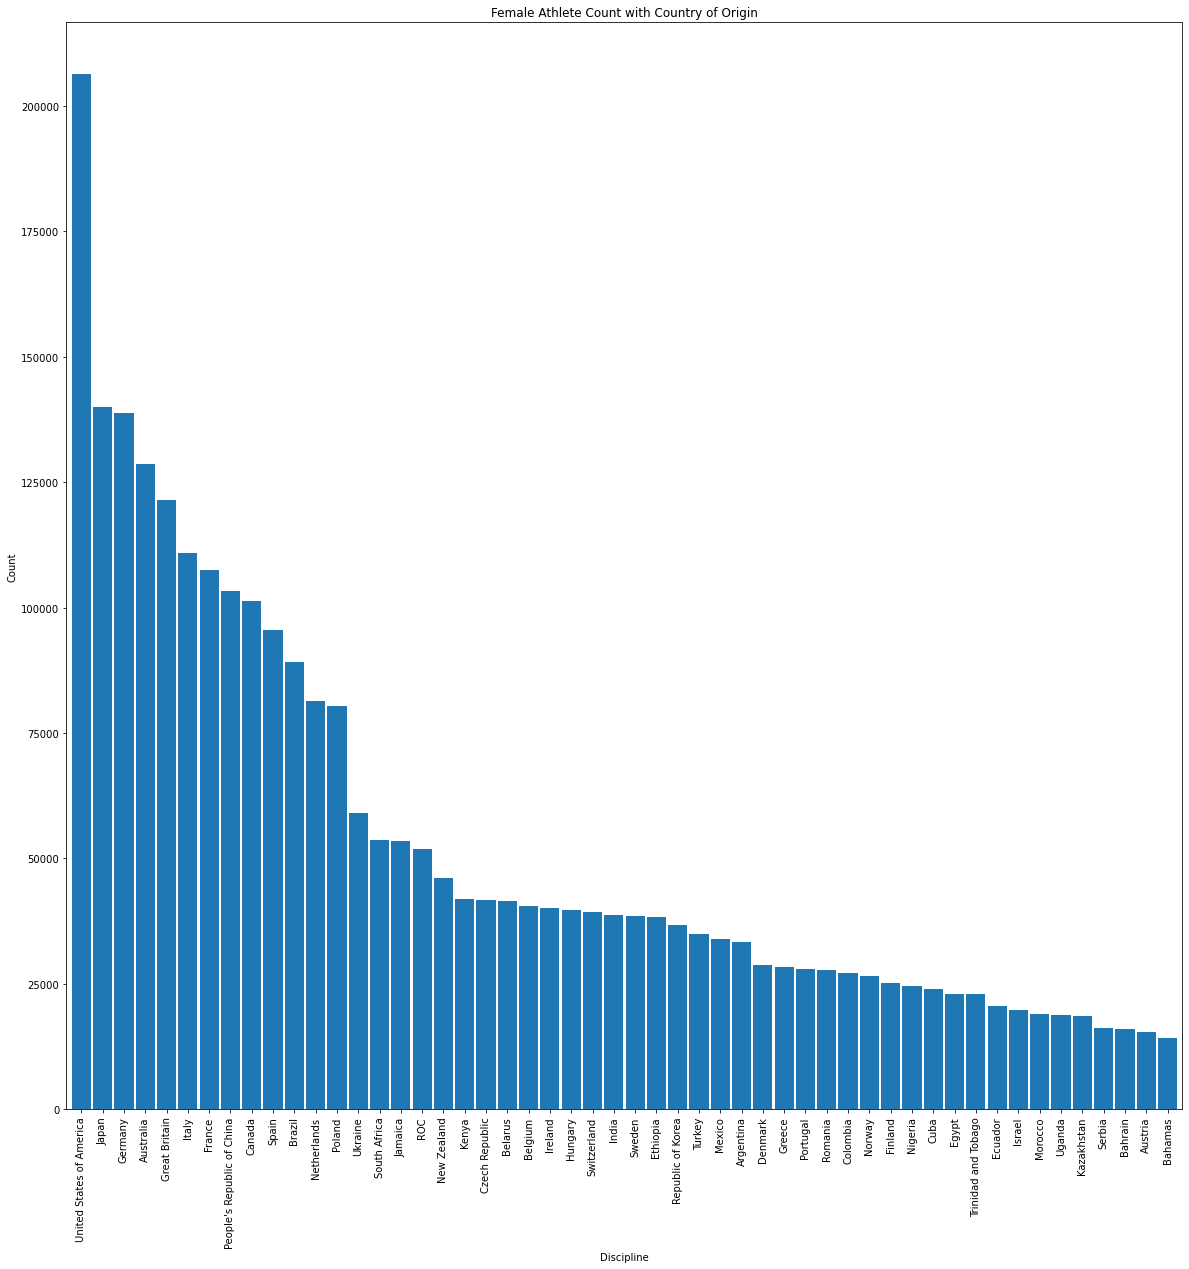

In [290]:
## descendingly ordered bar plot to show female athletes counts based on their country of origin
##united state of America has the highest
plt.figure(figsize= (20,20))
Female_count.head(52).plot(kind = 'bar', width = 0.9) ## show for only 52 entries, in order not to mess the bar plot up
plt.ylabel('Count')
plt.xlabel('Discipline')
plt.title('Female Athlete Count with Country of Origin')
plt.xticks(rotation= 'vertical')
plt.show()


### 3. Which country has the least female athletes?

In [291]:
## Myanmar has the least female athlete
Female_count = country_gender.groupby('NOC')['Female'].sum().sort_values(ascending= True)
Female_count.head()


NOC
Myanmar     264
Bermuda     312
Vanuatu     449
Suriname    537
Bhutan      603
Name: Female, dtype: int64

### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? Plot a descendingly ordered bar plot to show athlete counts in different sports? 

In [292]:
# lets look at the data set
athlete_data

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


In [293]:
#Athletics is the most popular sport 
popular_sport = athlete_data["Discipline"].value_counts()
popular_sport

Athletics                2068
Swimming                  743
Football                  567
Rowing                    496
Hockey                    406
Judo                      373
Handball                  343
Shooting                  342
Sailing                   336
Rugby Sevens              283
Basketball                280
Wrestling                 279
Volleyball                274
Boxing                    270
Water Polo                269
Fencing                   249
Equestrian                237
Canoe Sprint              236
Baseball/Softball         220
Cycling Track             208
Cycling Road              190
Weightlifting             187
Artistic Gymnastics       187
Tennis                    178
Badminton                 164
Table Tennis              164
Diving                    133
Taekwondo                 123
Archery                   122
Golf                      115
Triathlon                 106
Artistic Swimming          98
Rhythmic Gymnastics        95
Beach Voll

In [294]:
#United States of America has the highest participant in it

high_participant = athlete_data[["Discipline", 'NOC']].value_counts()
high_participant


Discipline  NOC                     
Athletics   United States of America    144
            Germany                      95
            Great Britain                75
            Italy                        73
            Japan                        70
                                       ... 
Badminton   Peru                          1
            Pakistan                      1
Sailing     Guatemala                     1
Badminton   Myanmar                       1
Judo        Malawi                        1
Length: 2112, dtype: int64

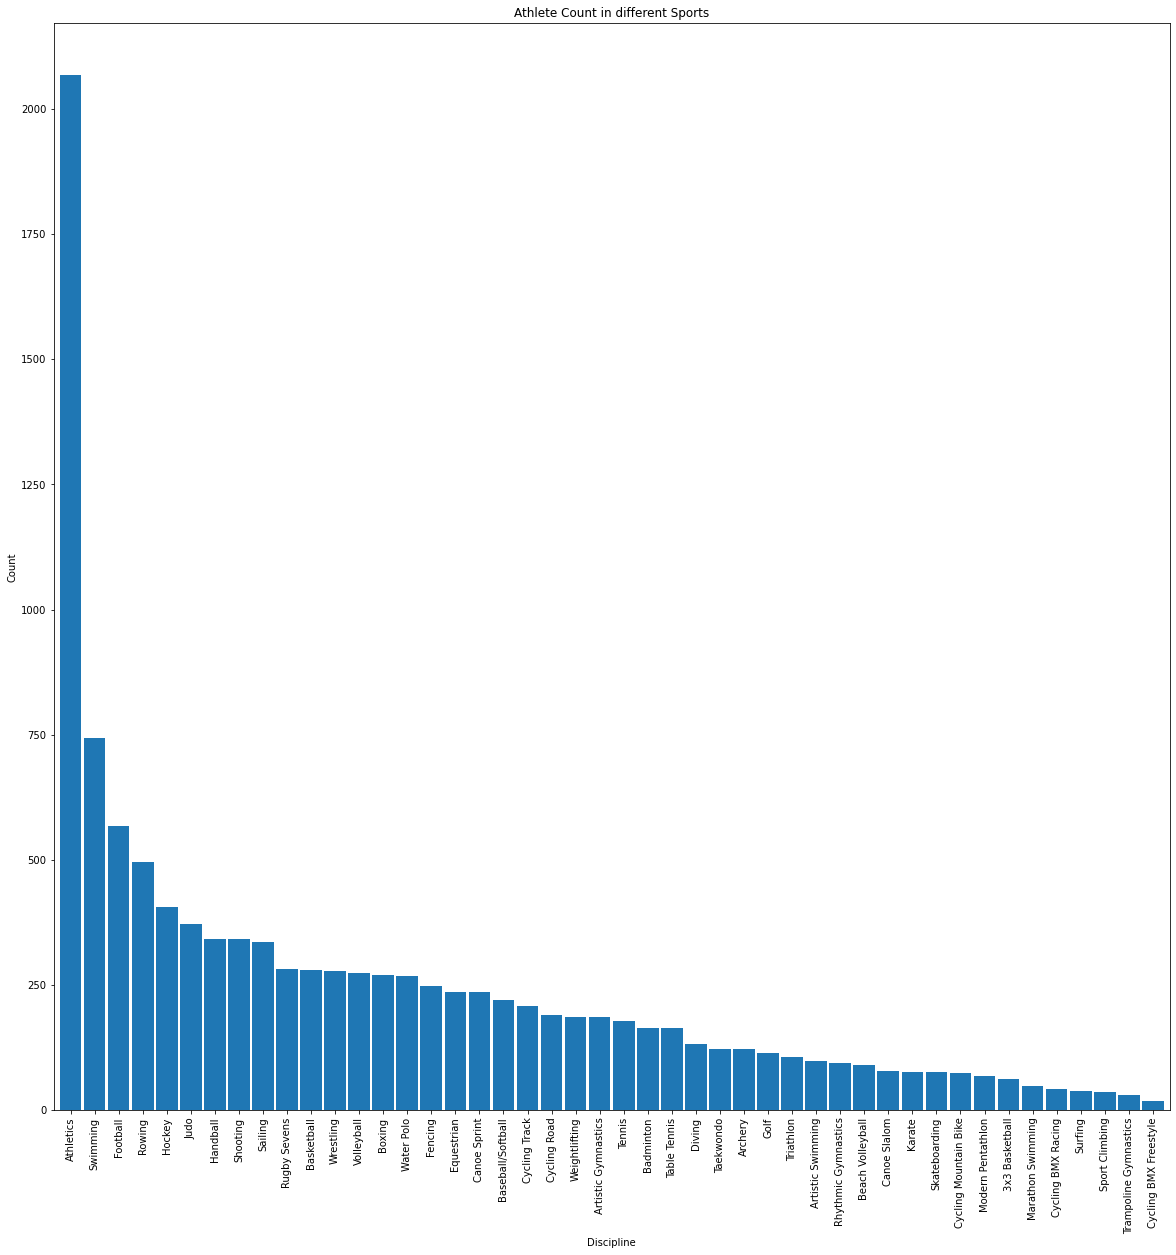

In [295]:
#Descendingly ordered bar plot to show athlete counts in different sports
plt.figure(figsize= (20,20))
athlete_data["Discipline"].value_counts().plot(kind = 'bar', width = 0.9)
plt.ylabel('Count')
plt.xlabel('Discipline')
plt.title('Athlete Count in different Sports')
plt.xticks(rotation= 'vertical')
plt.show()

### 5. Plot a descendingly ordered categorical bar plot to show gender segregated athlete counts in different sports.

In [296]:
## merging gender data with athlete data
country = pd.merge(left = athlete_data, right = gender_data, how = 'outer').sort_values(by = 'Female', ascending = True)
country

,Name,NOC,Discipline,Female,Male,Total
11039,MARTIN Logan,Australia,Cycling BMX Freestyle,10,9,19
11030,BROOKS Declan,Great Britain,Cycling BMX Freestyle,10,9,19
11031,BRUCE Nick,United States of America,Cycling BMX Freestyle,10,9,19
11047,WORTHINGTON Charlotte,Great Britain,Cycling BMX Freestyle,10,9,19
11046,TENCIO ESQUIVEL Kenneth Fabian,Costa Rica,Cycling BMX Freestyle,10,9,19
...,...,...,...,...,...,...
4012,MALACOVA Romana,Czech Republic,Athletics,969,1072,2041
4011,MALACHOWSKI Piotr,Poland,Athletics,969,1072,2041
4010,MAKWALA Isaac,Botswana,Athletics,969,1072,2041
4008,MAKI Kristiina,Czech Republic,Athletics,969,1072,2041


In [297]:
## this print out the data of male and female in different sports
gender_count = country_gender.groupby('Discipline')[['Female', 'Male']].count().sort_values(by = 'Female', ascending= False)
gender_count.head(10)


,Female,Male
Discipline,,
Athletics,2068,2068
Swimming,743,743
Football,567,567
Rowing,496,496
Hockey,406,406
Judo,373,373
Handball,343,343
Shooting,342,342
Sailing,336,336


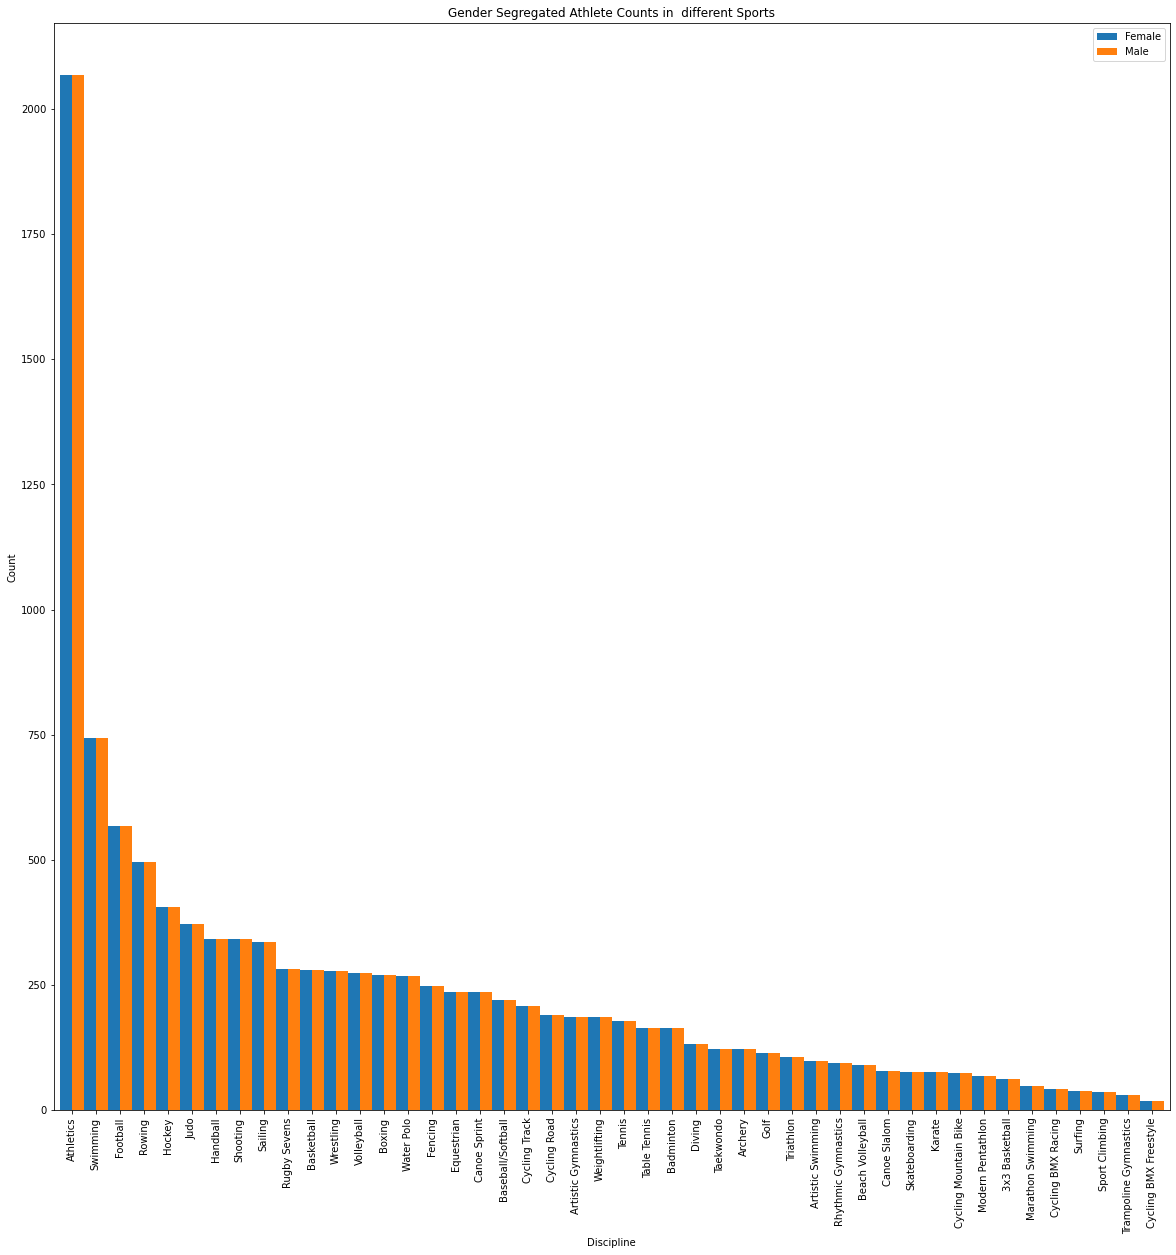

In [298]:
## descendingly ordered categorical bar plot to show gender segregated athletes count in different sport
gender_count.plot(kind = 'bar', width = 1.0, figsize = (20, 20))
plt.ylabel('Count')
plt.xlabel('Discipline')
plt.title('Gender Segregated Athlete Counts in  different Sports')
plt.xticks(rotation= 'vertical')
plt.show()

### 6. Which sport has they highest proportion of male to female athletes? Plot a descendingly ordered bar plot to depict male to female athletes proportion across different sports.

In [299]:
## athletics has the highest proportion of male to female
gender_proportion = gender_data.groupby('Discipline')[['Female', 'Male']].sum().sort_values(['Female', 'Male'],ascending = False)
gender_proportion.head()


,Female,Male
Discipline,,
Athletics,969,1072
Swimming,361,418
Football,264,344
Rowing,257,265
Judo,192,201


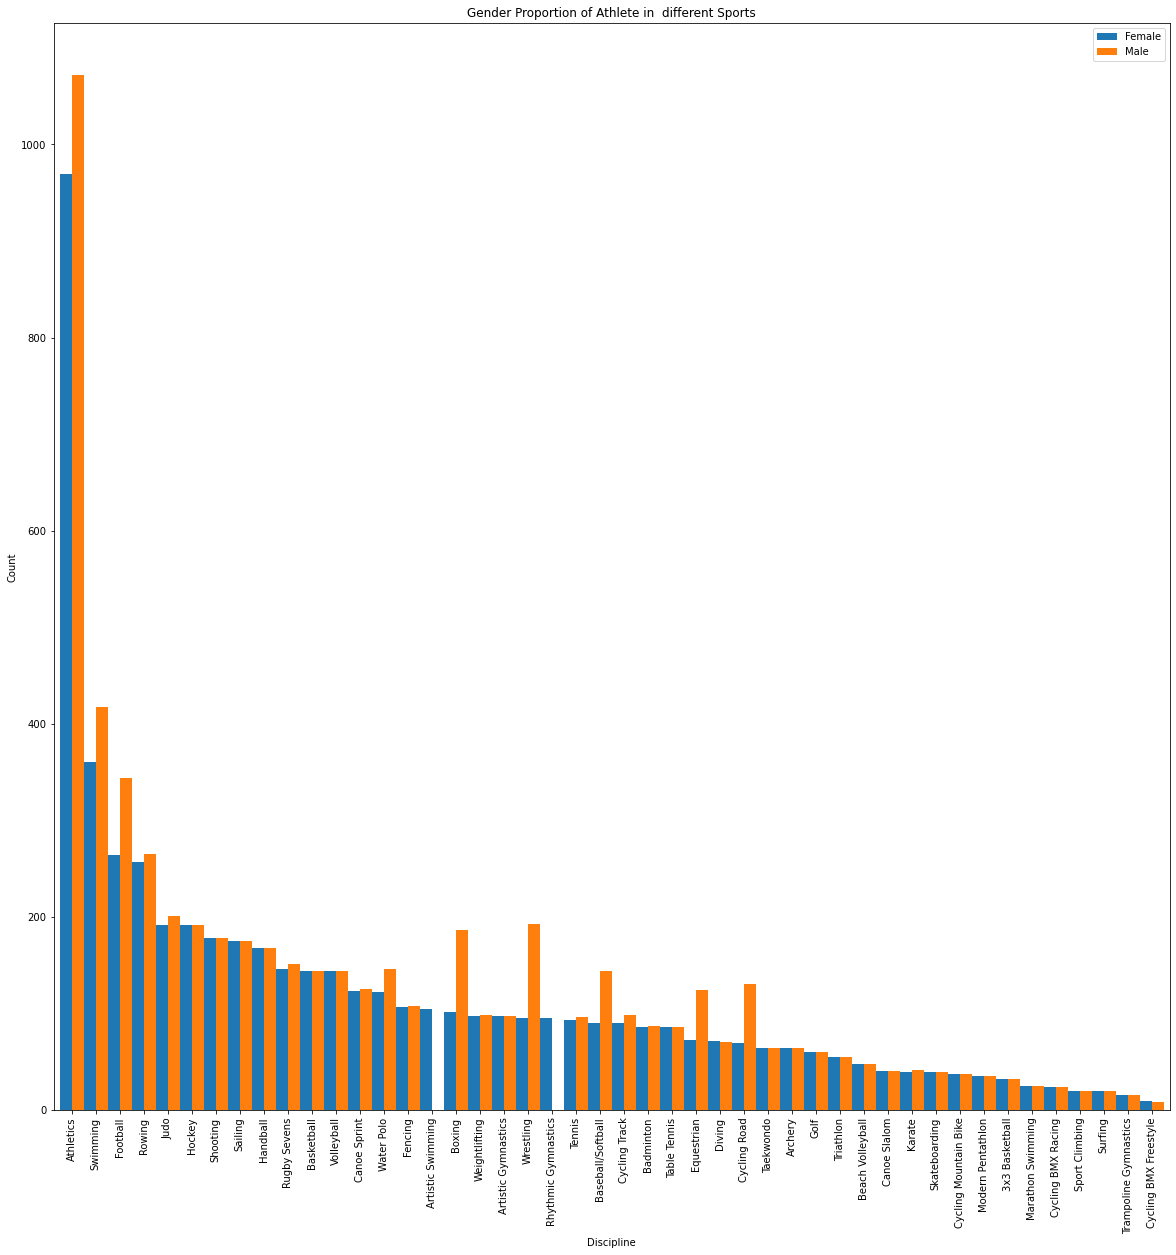

In [300]:
## descendingly ordered bar plot depicting male to female athletes proportion across different sports
gender_proportion.head(52).plot(kind = 'bar', width = 1.0, figsize = (20, 20))
plt.ylabel('Count')
plt.xlabel('Discipline')
plt.title('Gender Proportion of Athlete in  different Sports')
plt.xticks(rotation= 'vertical')
plt.show()

### 7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? Use bar plot to for illustration.  

In [301]:
medal_category = medal_data.groupby('Team/NOC')[['Gold','Silver','Bronze']].sum().sort_values(['Gold','Silver','Bronze'],ascending= False)
medal_category.head(10)

,Gold,Silver,Bronze
Team/NOC,,,
United States of America,39,41,33
People's Republic of China,38,32,18
Japan,27,14,17
Great Britain,22,21,22
ROC,20,28,23
Australia,17,7,22
Netherlands,10,12,14
France,10,12,11
Germany,10,11,16


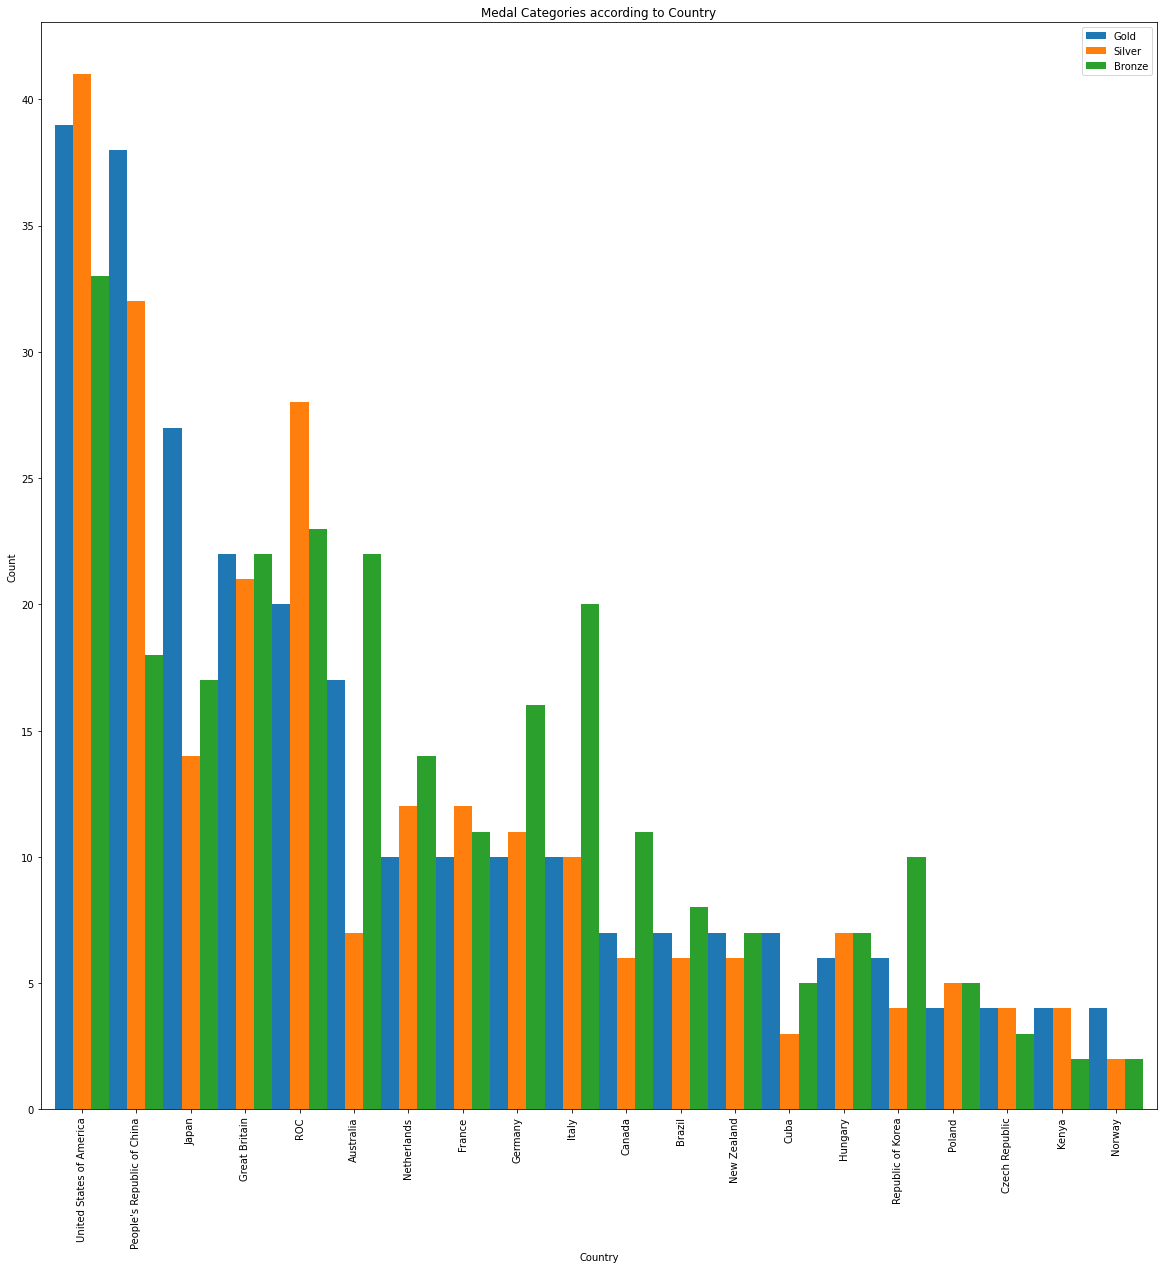

In [302]:
## bar plot showing medals
medal_category.head(20).plot(kind = 'bar', width = 1.0, figsize = (20, 20))
plt.ylabel('Count')
plt.xlabel('Country')
plt.title('Medal Categories according to Country')
plt.xticks(rotation= 'vertical')
plt.show()

### 8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)? 

In [303]:
##United States of America has the highest number of Gold, Silver and Bronze per Participant. 
medal_data.groupby('Team/NOC')[['Gold','Silver','Bronze']].sum().sort_values(['Gold','Silver','Bronze'],ascending= False).head()



,Gold,Silver,Bronze
Team/NOC,,,
United States of America,39,41,33
People's Republic of China,38,32,18
Japan,27,14,17
Great Britain,22,21,22
ROC,20,28,23


### 9. List countries with no medals? 

In [304]:
# every country had at least one medal
medal_data.groupby('Team/NOC')['Total'].sum().sort_values(ascending= True).to_frame()

,Total
Team/NOC,
Puerto Rico,1
Kuwait,1
Lithuania,1
Côte d'Ivoire,1
Morocco,1
...,...
Japan,58
Great Britain,65
ROC,71


### 10. Which country had the greatest number of coaches. Plot a descendingly ordered bar plot to show coach counts in different countries. 

In [305]:
##Japan has the highest number of coach
coach_count = coach_data.groupby('NOC')['Name'].count().sort_values(ascending = False).to_frame()
coach_count.head()


,Name
NOC,
Japan,35
United States of America,28
Spain,28
Australia,22
Canada,16


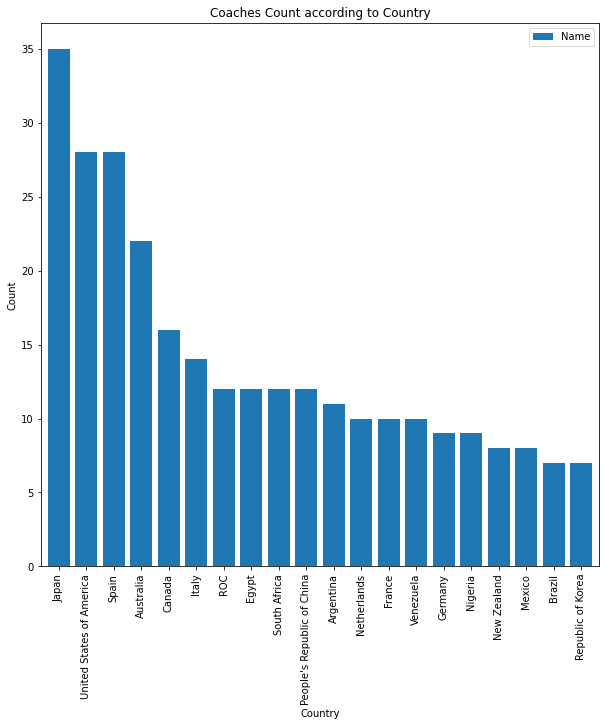

In [306]:
## descendingly ordered bar plot to show coac counts in different countries
coach_count.head(20).plot(kind = 'bar', width = 0.8, figsize = (10, 10))
plt.ylabel('Count')
plt.xlabel('Country')
plt.title('Coaches Count according to Country')
plt.xticks(rotation= 'vertical')
plt.show()

### 11. Plot a descendingly ordered bar plot to show coach counts across different sports.  

In [307]:
## lets take a look at the dataset
coach_data.head()



,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


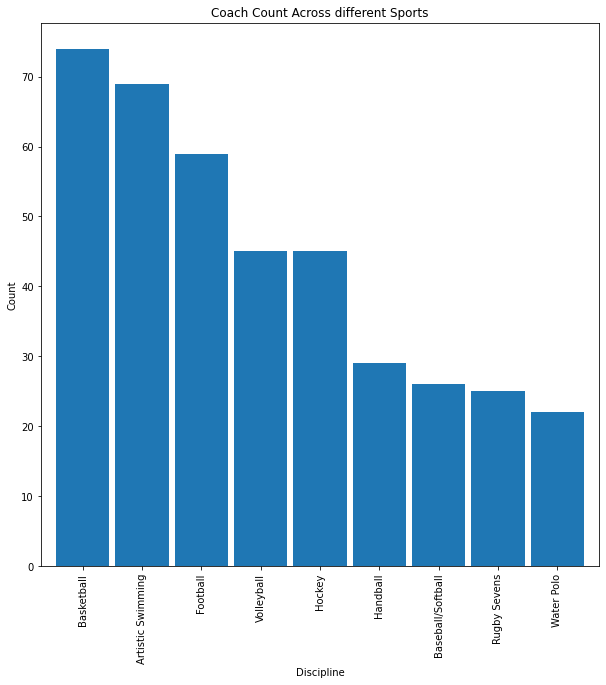

In [308]:
##bar plot showing coach count across different sport
plt.figure(figsize= (10,10))
coach_data["Discipline"].value_counts().plot(kind = 'bar', width = 0.9)
plt.ylabel('Count')
plt.xlabel('Discipline')
plt.title('Coach Count Across different Sports')
plt.xticks(rotation= 'vertical')
plt.show()

### 12. Identify the most popular coach, female and male athlete first name? 

In [309]:
#The max () function will be used to get  the coach with the highest value.
##Van Gundy Jeff is the most popular coach.
coach_data.agg({'Name':'max'})
        

Name    van GUNDY Jeff
dtype: object

In [310]:
##lets take a look at the athlete name to get the female and male athlete first name
athlete_data

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


In [311]:
## here the data set is filtered to display only the athlete first and last name
athlete_Name = athlete_data['Name'].str.split(' ', n = 1, expand = True)
athlete_Name

,0,1
0,AALERUD,Katrine
1,ABAD,Nestor
2,ABAGNALE,Giovanni
3,ABALDE,Alberto
4,ABALDE,Tamara
...,...,...
11080,ZWICKER,Martin Detlef
11081,ZWOLINSKA,Klaudia
11082,ZYKOVA,Yulia
11083,ZYUZINA,Ekaterina


In [312]:
## the column name will be renamed from o and 1 to first and last name of athlete
split_Name = athlete_data['Name'].str.split(' ', n = 1, expand = True).rename(columns = {0: 'First Name', 1: 'Last Name'})
split_Name

,First Name,Last Name
0,AALERUD,Katrine
1,ABAD,Nestor
2,ABAGNALE,Giovanni
3,ABALDE,Alberto
4,ABALDE,Tamara
...,...,...
11080,ZWICKER,Martin Detlef
11081,ZWOLINSKA,Klaudia
11082,ZYKOVA,Yulia
11083,ZYUZINA,Ekaterina


In [313]:
## the athlete first name is printed
print(split_Name['First Name'])
    

0          AALERUD
1             ABAD
2         ABAGNALE
3           ABALDE
4           ABALDE
           ...    
11080      ZWICKER
11081    ZWOLINSKA
11082       ZYKOVA
11083      ZYUZINA
11084     ZYZANSKA
Name: First Name, Length: 11085, dtype: object


# Section 3:  ( Chessboard ) - ( Weighting = 5% - Bonus )

A chessboard is an eight-by-eight grid of squares. A queen is a chess piece that can
move on the chessboard any number of squares along any row, column, or diagonal.
A queen is attacking another piece if in a single move, it can move to the square the
piece is on without jumping over any other piece. (In other words, if the other piece is
in the line of sight of the queen, then it is attacked by it.) The eight queens problem
poses the question of how eight queens can be placed on a chessboard without any
queen attacking another queen.

![queens](Dataset\queen.png)

To represent squares on the chessboard, we will assign each an integer row and an
integer column. We can ensure each of the eight queens is not on the same column
by simply assigning them sequentially the columns 1 through 8. The variables in our
constraint-satisfaction problem can just be the column of the queen in question. The
domains can be the possible rows (again, 1 through 8).

### Write a piece of code that prints out all the possible arrangements of eight queens on the chessboard. 
**Important:** Your code must be fully commented. 


In [314]:
## permutations provides us with all the possible arrangements of the chessboard
from itertools import permutations
Queen=8
sol=0
cols=range(Queen)
for eachvalue in permutations(cols):
    if Queen==len(set(eachvalue[i]+i for i in cols)) == len(set(eachvalue[i]-1 for i in cols)):
        sol=sol + 1
        ##generate the index value where the queen is going to be positioned
        print('Answer '+str(sol)+':'+str(eachvalue)+ '\n')
        ##print a chess board and post the queen at the indexed position
        print('\n'.join(' o ' * i + ' X ' + ' o ' * (Queen-i-1) for i in eachvalue) + '\n\n\n\n')




Answer 1:(0, 1, 2, 3, 4, 5, 6, 7)

 X  o  o  o  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  X  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  o  o  o  o  X 




Answer 2:(0, 1, 2, 3, 4, 6, 7, 5)

 X  o  o  o  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  o  X  o  o 




Answer 3:(0, 1, 2, 3, 4, 7, 5, 6)

 X  o  o  o  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  o  X  o  o 
 o  o  o  o  o  o  X  o 




Answer 4:(0, 1, 2, 3, 5, 6, 4, 7)

 X  o  o  o  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  X  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  o  X 




Answer 5:(0, 1, 2, 3, 5, 7, 4, 6)

 X  o  o 

 o  X  o  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  o  X  o 
 X  o  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  o  o  X  o  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  X  o  o  o 




Answer 563:(1, 3, 6, 0, 5, 2, 4, 7)

 o  X  o  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  o  X  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  o  X  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  o  X 




Answer 564:(1, 3, 6, 0, 5, 2, 7, 4)

 o  X  o  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  o  X  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  o  X  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  X  o  o  o 




Answer 565:(1, 3, 6, 0, 7, 2, 4, 5)

 o  X  o  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  o  X  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  o  o  o  X 
 o  o  X  o  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  X  o  o 




Answer 566:(1, 3, 6, 2, 5, 7, 0, 4)

 o  X  o  o  o  o  o  o 
 o  o  o  X

 o  o  o  X  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  X  o  o  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  o  X  o  o 
 o  o  o  o  o  o  X  o 




Answer 1248:(3, 1, 2, 7, 4, 6, 0, 5)

 o  o  o  X  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  X  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  o  X  o  o 




Answer 1249:(3, 1, 2, 7, 5, 0, 6, 4)

 o  o  o  X  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  o  X  o  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  o  X  o  o  o 




Answer 1250:(3, 1, 4, 2, 0, 5, 6, 7)

 o  o  o  X  o  o  o  o 
 o  X  o  o  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  X  o  o  o  o  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  o  X  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  o  o  o  o  X 




Answer 1251:(3, 1, 4, 2, 0, 6, 7, 5)

 o  o  o  X  o  o  o  o 
 o  X  

 o  o  o  o  o  X  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 X  o  o  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  o  X 




Answer 1725:(5, 1, 2, 0, 3, 7, 4, 6)

 o  o  o  o  o  X  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 X  o  o  o  o  o  o  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  o  o  X 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  X  o 




Answer 1726:(5, 1, 2, 0, 4, 6, 3, 7)

 o  o  o  o  o  X  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  X  o  o  o  o 
 o  o  o  o  o  o  o  X 




Answer 1727:(5, 1, 2, 0, 4, 6, 7, 3)

 o  o  o  o  o  X  o  o 
 o  X  o  o  o  o  o  o 
 o  o  X  o  o  o  o  o 
 X  o  o  o  o  o  o  o 
 o  o  o  o  X  o  o  o 
 o  o  o  o  o  o  X  o 
 o  o  o  o  o  o  o  X 
 o  o  o  X  o  o  o  o 




Answer 1728:(5, 1, 2, 0, 4, 7, 3, 6)

 o  o  o  o  o  X  o  o 
 o  X  

# Section 4:  ( Encryption ) - ( Weighting = 10% )

Encryption is the method by which information is converted into secret code that hides the information's true meaning. The science of encrypting and decrypting information is called cryptography.

In computing, unencrypted data is also known as plaintext, and encrypted data is called ciphertext. The formulas used to encode and decode messages are called encryption algorithms

In this task you need to create a simple transposition encryption algorithms where plaintext characters are re-arranged instead of replaced to encode a message. This algorithm  encodes a message by writing it down and up diagonally over successive rows as illustrated below. For example, the secret message **“THIS IS A SECRET MESSAGE”** encoded over 4 rails would look like this:

![queens](Dataset\cipher.png)

We then create the ciphertext by reading off characters left to right, top to bottom. For our example message, the cipher text becomes:

**TATGHSSEMAEIIERESSCS**

Write a piece of code capable of **encrypting** and **decrypting** a message using the aforementioned technique.  Use the last digit (most right) of your **SID** as the encryption key. 

Sample input plainText: **You speak an infinite deal of nothing.**

In [315]:
import math
## eight is the last most digit of my SID 
key = "eight"


# Encryption
def encryptMessage(msg):
    cipher = ""
   # track key indices
    k_indx = 0

    msg_len = float(len(msg))
    msg_lst = list(msg)
    key_lst = sorted(list(key))
    col = len(key)

  # calculate maximum row of the matrix
    row = int(math.ceil(msg_len / col))

 # add the padding character '_' in empty
    # the empty cell of the matix
    fill_null = int((row * col) - msg_len)
    msg_lst.extend('_' * fill_null)
# create Matrix and insert message and
    # padding characters row-wise
    matrix = [msg_lst[i: i + col]
              for i in range(0, len(msg_lst), col)]
 # read matrix column-wise using key
    for _ in range(col):
        curr_idx = key.index(key_lst[k_indx])
        cipher += ''.join([row[curr_idx]
                           for row in matrix])
        k_indx += 1

    return cipher


# Decryption
def decryptMessage(cipher):
    msg = ""


    k_indx = 0


    msg_indx = 0
    msg_len = float(len(cipher))
    msg_lst = list(cipher)

  # calculate column of the matrix
    col = len(key)


    row = int(math.ceil(msg_len / col))


    key_lst = sorted(list(key))


    dec_cipher = []
    for _ in range(row):
        dec_cipher += [[None] * col]


    for _ in range(col):
        curr_idx = key.index(key_lst[k_indx])

        for j in range(row):
            dec_cipher[j][curr_idx] = msg_lst[msg_indx]
            msg_indx += 1
        k_indx += 1


    try:
        msg = ''.join(sum(dec_cipher, []))
    except TypeError:
        raise TypeError("This program cannot",
                        "handle repeating words.")

    null_count = msg.count('_')

    if null_count > 0:
        return msg[: -null_count]

    return msg



msg = "You speak an infinite deal of nothing"

cipher = encryptMessage(msg)
new=cipher.replace('_','')
cipher_text=new.replace(' ','')
print("Encrypted Message: {}".
      format(cipher_text))

print("Decrypted Message: {}".
      format(decryptMessage(cipher)))














Encrypted Message: Ypafelnnuandotkiiefhoeniogsntai
Decrypted Message: You speak an infinite deal of nothing


## Good Luck!